In [6]:
import numpy as np
import pandas as pd
from itertools import combinations 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from Bio import SeqIO # biopython package
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from bioservices import UniProt 
import os

### load normalized expression from results-kallisto

In [7]:
# get all sample directories
dirs = next(os.walk('.'))[1]
# remove any unwanted directories
for ii,this_dir in enumerate(dirs): 
    if this_dir[0] == '.':
        del dirs[ii]
    

In [8]:
# the order in which we want the samples in 
dirs = ['LB0R1_S7','LB0R2_S8','LB0R3_S9','LB1R1_S10','LB1R2_S11','LB1R3_S12',
       'M9L8R1_S4','M9L8R2_S5','M9L8R3_S6','M95fR1_S1','M95fR2_S2','M95fR3_S3']

In [9]:
# Generating a dictionary with dataframe for each sample
df_dict = {}
for this_dir in dirs:
    df_dict[this_dir] = pd.read_csv(this_dir+'/abundance.tsv',sep='\t')
target_ids = list(df_dict[this_dir].target_id)

In [10]:
# generate df where the first column is target_id and the next columns are TPM from each sample
temp_dict = {'target_id':target_ids}
for sample,this_df in zip(list(df_dict.keys()),df_dict.values()): 
    temp_dict[sample] = this_df.tpm
df = pd.DataFrame(temp_dict)
df

,target_id,LB0R1_S7,LB0R2_S8,LB0R3_S9,LB1R1_S10,LB1R2_S11,LB1R3_S12,M9L8R1_S4,M9L8R2_S5,M9L8R3_S6,M95fR1_S1,M95fR2_S2,M95fR3_S3
0,lcl|CR543861.1_cds_CAG66986.1_1,298.2740,222.8160,306.2610,302.8680,300.4660,307.0410,60.46270,59.4571,48.8814,154.0610,135.4880,164.6930
1,lcl|CR543861.1_cds_CAG66987.1_2,302.3590,253.9690,292.0170,366.8120,265.3100,316.2670,29.53140,55.0744,57.5752,189.6850,151.6120,227.9460
2,lcl|CR543861.1_cds_CAG66988.1_3,254.4090,235.6500,180.6980,155.8340,226.5090,203.4650,87.86770,69.7656,75.6724,50.6984,55.3793,59.9481
3,lcl|CR543861.1_cds_CAG66989.1_4,582.1220,543.3160,423.3880,438.2860,618.6660,383.9690,90.85700,98.7740,114.1330,149.3250,150.0720,158.6460
4,lcl|CR543861.1_cds_CAG66990.1_5,48.0218,59.8179,57.9693,146.4400,60.4595,63.1651,1780.57000,2163.6600,1451.0800,269.3740,476.8390,277.2980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,lcl|CR543861.1_cds_CAG70306.1_3306,96.9972,92.2591,82.8728,88.5728,93.6614,90.2842,14.27430,14.4181,14.4821,37.2867,38.0886,39.4670
3306,lcl|CR543861.1_cds_CAG70307.1_3307,496.9740,558.8930,420.6900,482.1870,521.7930,487.7750,36.76940,35.9939,42.4929,131.7090,67.5656,143.5270
3307,lcl|CR543861.1_cds_CAG70308.1_3308,739.5000,583.1580,637.5990,717.8150,855.5350,690.6940,6.96282,16.2672,21.6265,110.7780,95.6713,184.3280
3308,lcl|CR543861.1_cds_CAG70309.1_3309,427.1080,432.5880,626.5620,679.1320,455.4800,568.7110,4.85510,11.3215,29.9688,268.3690,226.6770,423.5470


### target_id (results-kallisto) to gene (cds_from_genomic) mapping

In [11]:
fasta_path = '../GCA_000046845.1_ASM4684v1_cds_from_genomic.fna'
genbank_path = '../GCA_000046845.1_ASM4684v1_genomic.gbff'
fasta_records = list(SeqIO.parse(fasta_path,'fasta')) # full cds_from_genome fasta

In [12]:
genes,tags = {},{}
for ii,record in enumerate(fasta_records): 
    print(ii,record.description,'\n')

0 lcl|CR543861.1_cds_CAG66986.1_1 [gene=dnaA] [locus_tag=ACIAD0001] [db_xref=EnsemblGenomes-Gn:ACIAD0001,EnsemblGenomes-Tr:CAG66986,GOA:Q6FG21,InterPro:IPR001957,InterPro:IPR003593,InterPro:IPR010921,InterPro:IPR013159,InterPro:IPR013317,InterPro:IPR018312,InterPro:IPR020591,InterPro:IPR024633,InterPro:IPR027417] [protein=DNA replication initiator protein, transcriptional regulator of replication and housekeeping genes] [protein_id=CAG66986.1] [location=201..1598] [gbkey=CDS] 

1 lcl|CR543861.1_cds_CAG66987.1_2 [gene=dnaN] [locus_tag=ACIAD0002] [db_xref=EnsemblGenomes-Gn:ACIAD0002,EnsemblGenomes-Tr:CAG66987,GOA:Q6FG20,InterPro:IPR001001,InterPro:IPR022634,InterPro:IPR022635,InterPro:IPR022637,UniProtKB/TrEMBL:Q6FG20] [protein=DNA polymerase III, beta chain] [protein_id=CAG66987.1] [location=1834..2982] [gbkey=CDS] 

2 lcl|CR543861.1_cds_CAG66988.1_3 [gene=recF] [locus_tag=ACIAD0003] [db_xref=EnsemblGenomes-Gn:ACIAD0003,EnsemblGenomes-Tr:CAG66988,GOA:Q6FG19,InterPro:IPR001238,InterPro:I


638 lcl|CR543861.1_cds_CAG67626.1_639 [locus_tag=ACIAD0716] [db_xref=EnsemblGenomes-Gn:ACIAD0716,EnsemblGenomes-Tr:CAG67626,InterPro:IPR009671,UniProtKB/TrEMBL:Q6FE82] [protein=conserved hypothetical protein] [protein_id=CAG67626.1] [location=702842..703225] [gbkey=CDS] 

639 lcl|CR543861.1_cds_CAG67627.1_640 [locus_tag=ACIAD0717] [db_xref=EnsemblGenomes-Gn:ACIAD0717,EnsemblGenomes-Tr:CAG67627,GOA:Q6FE81,InterPro:IPR013538,InterPro:IPR023393,UniProtKB/TrEMBL:Q6FE81] [protein=conserved hypothetical protein] [protein_id=CAG67627.1] [location=703360..703800] [gbkey=CDS] 

640 lcl|CR543861.1_cds_CAG67628.1_641 [locus_tag=ACIAD0718] [db_xref=EnsemblGenomes-Gn:ACIAD0718,EnsemblGenomes-Tr:CAG67628,InterPro:IPR021330,UniProtKB/TrEMBL:Q6FE80] [protein=conserved hypothetical protein; putative signal peptide] [protein_id=CAG67628.1] [location=703877..704395] [gbkey=CDS] 

641 lcl|CR543861.1_cds_CAG67629.1_642 [locus_tag=ACIAD0719] [db_xref=EnsemblGenomes-Gn:ACIAD0719,EnsemblGenomes-Tr:CAG67629,I

1304 lcl|CR543861.1_cds_CAG68292.1_1305 [locus_tag=ACIAD1427] [db_xref=EnsemblGenomes-Gn:ACIAD1427,EnsemblGenomes-Tr:CAG68292,InterPro:IPR005017,UniProtKB/TrEMBL:Q6FCB9] [protein=putative fatty acid and hydrocarbon transporter (SalD)] [protein_id=CAG68292.1] [location=complement(1422922..1424088)] [gbkey=CDS] 

1305 lcl|CR543861.1_cds_CAG68293.1_1306 [gene=areA] [locus_tag=ACIAD1428] [db_xref=EnsemblGenomes-Gn:ACIAD1428,EnsemblGenomes-Tr:CAG68293,GOA:Q9XC26,InterPro:IPR002168,InterPro:IPR013094,InterPro:IPR029058,UniProtKB/TrEMBL:Q9XC26] [protein=esterase for aryl ester catabolic pathway] [protein_id=CAG68293.1] [location=complement(1424279..1425259)] [gbkey=CDS] 

1306 lcl|CR543861.1_cds_CAG68294.1_1307 [gene=areB] [locus_tag=ACIAD1429] [db_xref=EnsemblGenomes-Gn:ACIAD1429,EnsemblGenomes-Tr:CAG68294,GOA:Q9XC27,InterPro:IPR002085,InterPro:IPR002328,InterPro:IPR011032,InterPro:IPR013149,InterPro:IPR013154,InterPro:IPR016040,UniProtKB/TrEMBL:Q9XC27] [protein=aryl-alcohol dehydrogenase] [


1971 lcl|CR543861.1_cds_CAG68958.1_1972 [locus_tag=ACIAD2157] [db_xref=EnsemblGenomes-Gn:ACIAD2157,EnsemblGenomes-Tr:CAG68958,UniProtKB/TrEMBL:Q6FAF5] [protein=hypothetical protein; putative signal peptide] [protein_id=CAG68958.1] [location=complement(2142009..2143055)] [gbkey=CDS] 

1972 lcl|CR543861.1_cds_CAG68959.1_1973 [locus_tag=ACIAD2158] [db_xref=EnsemblGenomes-Gn:ACIAD2158,EnsemblGenomes-Tr:CAG68959,UniProtKB/TrEMBL:Q6FAF4] [protein=hypothetical protein] [protein_id=CAG68959.1] [location=complement(2143129..2143377)] [gbkey=CDS] 

1973 lcl|CR543861.1_cds_CAG68960.1_1974 [locus_tag=ACIAD2159] [db_xref=EnsemblGenomes-Gn:ACIAD2159,EnsemblGenomes-Tr:CAG68960,UniProtKB/TrEMBL:Q6FAF3] [protein=hypothetical protein] [protein_id=CAG68960.1] [location=complement(2143389..2143724)] [gbkey=CDS] 

1974 lcl|CR543861.1_cds_CAG68961.1_1975 [locus_tag=ACIAD2160] [db_xref=EnsemblGenomes-Gn:ACIAD2160,EnsemblGenomes-Tr:CAG68961,UniProtKB/TrEMBL:Q6FAF2] [protein=hypothetical protein] [protein_id=

2637 lcl|CR543861.1_cds_CAG69639.1_2638 [locus_tag=ACIAD2924] [db_xref=EnsemblGenomes-Gn:ACIAD2924,EnsemblGenomes-Tr:CAG69639,UniProtKB/TrEMBL:Q6F8H6] [protein=conserved hypothetical protein] [protein_id=CAG69639.1] [location=complement(2853958..2854167)] [gbkey=CDS] 

2638 lcl|CR543861.1_cds_CAG69640.1_2639 [gene=rpoD] [locus_tag=ACIAD2925] [db_xref=EnsemblGenomes-Gn:ACIAD2925,EnsemblGenomes-Tr:CAG69640,GOA:Q6F8H5,InterPro:IPR000943,InterPro:IPR007127,InterPro:IPR007624,InterPro:IPR007627,InterPro:IPR007630,InterPro:IPR007631,InterPro:IPR009042,InterPro:IPR011991,InterPro:IPR012760,InterPro:IPR013324,InterPro:IPR013325,InterPro:IPR014284,InterPro:IPR028630,UniProtKB/TrEMBL:Q6F8H5] [protein=sigma D (sigma 70) factor of RNA polymerase, major sigma factor during exponential growth] [protein_id=CAG69640.1] [location=2854534..2856423] [gbkey=CDS] 

2639 lcl|CR543861.1_cds_CAG69641.1_2640 [locus_tag=ACIAD2926] [db_xref=EnsemblGenomes-Gn:ACIAD2926,EnsemblGenomes-Tr:CAG69641,InterPro:IPR00745


3304 lcl|CR543861.1_cds_CAG70305.1_3305 [locus_tag=ACIAD3679] [db_xref=EnsemblGenomes-Gn:ACIAD3679,EnsemblGenomes-Tr:CAG70305,GOA:Q6F6L2,InterPro:IPR006143,UniProtKB/TrEMBL:Q6F6L2] [protein=putative multidrug resistance efflux pump] [protein_id=CAG70305.1] [location=complement(3592533..3593609)] [gbkey=CDS] 

3305 lcl|CR543861.1_cds_CAG70306.1_3306 [gene=trmE] [locus_tag=ACIAD3680] [db_xref=EnsemblGenomes-Gn:ACIAD3680,EnsemblGenomes-Tr:CAG70306,GOA:Q6F6L1,InterPro:IPR004520,InterPro:IPR005225,InterPro:IPR006073,InterPro:IPR018948,InterPro:IPR025867,InterPro:IPR027266,InterPro:IPR027368,InterPro:IPR027417] [protein=GTPase involved in tRNA modification and in thiophene and furan oxidation] [protein_id=CAG70306.1] [location=complement(3594065..3595453)] [gbkey=CDS] 

3306 lcl|CR543861.1_cds_CAG70307.1_3307 [gene=oxaA] [locus_tag=ACIAD3681] [db_xref=EnsemblGenomes-Gn:ACIAD3681,EnsemblGenomes-Tr:CAG70307,GOA:Q6F6L0,InterPro:IPR001708,InterPro:IPR019998,InterPro:IPR028053,InterPro:IPR028055

In [13]:
def getRecords(fasta_path,genbank_path,target_ids):
    # have to use cds_from_genome.fasta because this is the where the target_ids came from (e.g. lcl|AM181176.4_cds_CAY53368.1_5775)
    fasta_records = list(SeqIO.parse(fasta_path,'fasta')) # full cds_from_genome fasta
    keep_fasta_records = [] # getting records of genes that we have used
    for tx in target_ids:
        for rec in fasta_records:
            if rec.name == tx:
                keep_fasta_records.append(rec)
    # match locus_tags in keep_records (from fasta) with tags in genbank to easily parse rest of cds' description 
    # can grab locus_tags from the fasta description, other info need to grab from the genbank
    genes, locus_tags = [],[] 
    for rec in keep_fasta_records:
        rec_elems = [x.strip().strip(']') for x in rec.description.split(' [')]
        if 'gene=' in str(rec_elems): # sequence has gene name (e.g. gene=dnaA)
            genes.append(rec_elems[1][5:])
            locus_tags.append(rec_elems[2][10:])
        elif 'gene=' not in str(rec_elems): # sequence has no gene name, but has locus tag
            genes.append('N/A')
            locus_tags.append(rec_elems[1][10:])
    gb_records = next(SeqIO.parse(genbank_path,'genbank'))
    
    locations = []
    for tag in locus_tags:
            for feature in gb_records.features:
                if feature.type == 'CDS':
                    if feature.qualifiers['locus_tag'][0] == tag: 
                        if feature.strand == 1: # 5' -> 3'
                            locations.append([feature.location.start.position,feature.location.end.position,1])
                        elif feature.strand == -1: # 3' -> 5' (complementary)
                            locations.append([feature.location.start.position,feature.location.end.position,-1])            
    
    return {'gene':genes}, {'tag':locus_tags}, {'location':locations}


In [14]:
genes,tags,locs = getRecords(fasta_path,genbank_path,target_ids)

In [15]:
df = pd.concat([pd.DataFrame(genes),pd.DataFrame(tags),pd.DataFrame(df)],axis=1)

<AxesSubplot:>

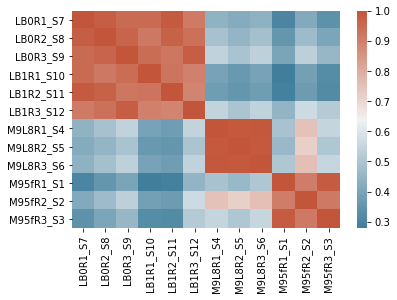

In [16]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.iloc[:,3:].corr(),cmap=cmap)

In [17]:
print(df.head())
print(np.shape(df))

   gene        tag                        target_id  LB0R1_S7  LB0R2_S8  \
0  dnaA  ACIAD0001  lcl|CR543861.1_cds_CAG66986.1_1  298.2740  222.8160   
1  dnaN  ACIAD0002  lcl|CR543861.1_cds_CAG66987.1_2  302.3590  253.9690   
2  recF  ACIAD0003  lcl|CR543861.1_cds_CAG66988.1_3  254.4090  235.6500   
3  gyrB  ACIAD0004  lcl|CR543861.1_cds_CAG66989.1_4  582.1220  543.3160   
4   N/A  ACIAD0005  lcl|CR543861.1_cds_CAG66990.1_5   48.0218   59.8179   

   LB0R3_S9  LB1R1_S10  LB1R2_S11  LB1R3_S12  M9L8R1_S4  M9L8R2_S5  M9L8R3_S6  \
0  306.2610    302.868   300.4660   307.0410    60.4627    59.4571    48.8814   
1  292.0170    366.812   265.3100   316.2670    29.5314    55.0744    57.5752   
2  180.6980    155.834   226.5090   203.4650    87.8677    69.7656    75.6724   
3  423.3880    438.286   618.6660   383.9690    90.8570    98.7740   114.1330   
4   57.9693    146.440    60.4595    63.1651  1780.5700  2163.6600  1451.0800   

   M95fR1_S1  M95fR2_S2  M95fR3_S3  
0   154.0610   135.4880  

# Let's do some ordering on the genes

## but first, we need to get the data in a format that we can easily work with.

In a sense we have 9 pieces of data, one for each t0 to t1 condition and one for each replicate (we have three conditions, LB, M9Lq and M9Su; and we have three replicates so $3\times 3=9$). So we can make a numpy array for each of these three, and store them all in a dictionary.

In [18]:
int2cond = {1:"LBLq", 2:"M9Lq", 3:"M9Su"}
datasets = {}
genes = df["gene"].to_numpy()
tags = df["tag"].to_numpy()

start_cols = ["LB0R1_S7", "LB0R2_S8", "LB0R3_S9"]
end_cols = [["LB1R1_S10", "LB1R2_S11", "LB1R3_S12"],
            ["M9L8R1_S4", "M9L8R2_S5", "M9L8R3_S6"],
            ["M95fR1_S1", "M95fR2_S2", "M95fR3_S3"]]

for i, start_col in enumerate(start_cols):
    for j, end_col in enumerate(end_cols[i]):
        df_data = df[["gene", "tag", start_col, end_col]]
        df_cut_data = df_data.loc[df_data["gene"] != "N/A"]
        df_cut_data_nums = df_cut_data[[start_col, end_col]]
        genes = df_cut_data["gene"].to_numpy()
        tags = df_cut_data["tag"].to_numpy()
        data = df_cut_data_nums.to_numpy()
        datasets["R" + str(i+1) + "C" + str(j+1)] = data

for i in range(3):
    for j in range(3):
        print(np.shape(datasets["R" + str(i+1) + "C" + str(j+1)]))
print(genes)
print(tags)

(1152, 2)
(1152, 2)
(1152, 2)
(1152, 2)
(1152, 2)
(1152, 2)
(1152, 2)
(1152, 2)
(1152, 2)
['dnaA' 'dnaN' 'recF' ... 'oxaA' 'rnpA' 'rpmH']
['ACIAD0001' 'ACIAD0002' 'ACIAD0003' ... 'ACIAD3681' 'ACIAD3683'
 'ACIAD3684']


In [19]:
def sort_results(results, labels=genes):
    """
    Sorts the results and returns the labels in the order that the results were sorted to.
    @returns: sorted_labels: an array of the labels.
    """
    index_array = np.argsort(results)
    sorted_labels = labels[index_array]
    return sorted_labels

# test
results = np.array([5,3,4,1,2])
labels = np.array(["five", "three", "four", "one", "two"])
print(sort_results(results, labels))

['one' 'two' 'three' 'four' 'five']


In [20]:
for i in range(3):
    for j in range(3):
        # we add a tiny bit to everything so that we don't divide by zero...
        data = datasets["R" + str(i+1) + "C" + str(j+1)] + 0.1 

        # compare fold-increase vs difference results
        fold_increase_res = np.divide(data[:, 1], data[:, 0])
        diff_res = np.subtract(data[:, 1], data[:, 0])
        sorted_fold_increase_genes = sort_results(fold_increase_res)
        sorted_diff_genes = sort_results(diff_res)

        # We are looking at lowest to highest.
        #print(sort_results(fold_increase_res, fold_increase_res), "This is lowest to highest. \n\n")

        #print(sorted_fold_increase_genes[:25])
        #print(sorted_diff_genes[:25], "\n\n")

        # The lowest fold-increase prioritizes genes that are going down to a low/zero expression (turning off).
        # While measuring difference does not.
        # This property could be useful for classification as it could promote looking at on-off behavior.

        sorted_fold_increase_pre = sort_results(fold_increase_res, data[:, 0])
        sorted_fold_increase_post = sort_results(fold_increase_res, data[:, 1])
        sorted_diff_post = sort_results(diff_res, data[:, 1])
        #print(sorted_fold_increase_post[:25])
        #print(sorted_diff_post[:25], "\n\n")
        print(i+1, j+1)
        
        print(sorted_fold_increase_genes[:14])
        print(sorted_fold_increase_pre[:14])
        print(sorted_fold_increase_post[:14], "\n")

        # This more-or-less works on the other end of the spectrum.
        print(sorted_fold_increase_genes[-14:])
        print(sorted_fold_increase_pre[-14:])
        print(sorted_fold_increase_post[-14:], "\n\n")



1 1
['pcaI' 'tatC' 'tatB' 'braF' 'atsC' 'otsB' 'quiB' 'atsA' 'pqqD' 'dgkA'
 'tatB' 'glnT' 'antA' 'bcp']
[ 23.4537     6.9603     2.80549    2.23635    1.14847    1.076425
  16.6466     7.37762   58.5718    29.5558    18.6726     8.99746
  15.9172   245.99    ]
[ 0.1193879  0.1        0.1        0.1        0.1        0.1
  1.75225    0.830719   7.65191    4.71994    3.76173    1.885
  3.60184   58.146    ] 

['pqqA' 'salR' 'catI' 'rpmG' 'astB' 'entA' 'hcaD' 'pcaJ' 'astC' 'astA'
 'astD' 'hemO' 'soxD' 'mdcC']
[2.34241e+02 2.92027e+00 9.44150e+00 6.88271e+02 2.73702e+01 3.39748e+00
 1.49978e+00 5.99486e+00 7.63533e+01 4.67014e+01 3.30390e+01 1.66965e+00
 1.00000e-01 1.00000e-01]
[ 704.805      9.11973   31.341   2299.36      95.0625    12.385
    5.70874   32.5179   423.346    263.19     203.235     12.5755
   12.9544    22.7557 ] 


1 2
['nthA' 'catJ' 'dgkA' 'ddrR' 'purU' 'tatA' 'atsB' 'areC' 'ssuD' 'braG'
 'tpm' 'pauA' 'pcaC' 'pcaH']
[ 9.51792 20.732   29.5558  95.8461   3.989   48.1218 

# How to get at the single-best gene for classification?

For each gene we have a single number for each condition. 
So we can say that each gene has a profile of: $x = [x_1, x_2, x_3, x_4]$. Here 1 is the LB at time 0, 2 is the LB at time 1, 3 is the M9 liquid at time 1 and 4 is the M9 surface at time 1.

In [21]:
xs = np.random.uniform(0, 1, [10000, 4])
# We need to pick the row that shows the most difference between each of the four components: x1, x2, x3, x4

best_score = -1e10000
best_array = []

def scoring_function1(x):
    # This scoring function gives two high and two low.
    my_sum = 0
    for i, x_i in enumerate(x):
        for j in range(i, len(x)):
            my_sum += np.abs(x_i - x[j])
    return my_sum


def scoring_function2(x):
    # This scoring function gives inconsistant results
    def term(xi, xj, xk):
        return np.abs(xi - xj) / xk
    my_sum = 0
    for i in range(4):
        for j in range(4):
            for k in range(4):
                if i != j:
                    if i != k:
                        if j != k:
                            my_sum += term(x[i], x[j], x[k])
    return my_sum

def scoring_function(x, verbose=False):
    # This scoring function gives a good spread (the most distinct!)
    diffs = []
    for i in range(len(x)):
        for j in range(len(x)):
            if i != j:
                diffs.append(np.abs(x[i] - x[j]))
    if verbose:
        print(diffs)
    return np.min(diffs)

for x in xs:
    x_score = scoring_function(x)
    if x_score > best_score:
        best_score = x_score
        best_array = x

print(best_score, np.round(best_array, 4))
print(scoring_function([0., 1., 0.25361276, 0.3452763], True))
print(scoring_function([0.45402936, 0., 0., 1.], True))


0.3195768683768926 [0.6648 0.9843 0.0035 0.3429]
[1.0, 0.25361276, 0.3452763, 1.0, 0.74638724, 0.6547237, 0.25361276, 0.74638724, 0.09166353999999999, 0.3452763, 0.6547237, 0.09166353999999999]
0.09166353999999999
[0.45402936, 0.45402936, 0.54597064, 0.45402936, 0.0, 1.0, 0.45402936, 0.0, 1.0, 0.54597064, 1.0, 1.0]
0.0


In [22]:
# Grab all of the genes across all the conditions together
full_datasets = {}
genes = df["gene"].to_numpy()
tags = df["tag"].to_numpy()

start_cols = ["LB0R1_S7", "LB0R2_S8", "LB0R3_S9"]
end_col = [["LB1R1_S10", "LB1R2_S11", "LB1R3_S12"],
            ["M9L8R1_S4", "M9L8R2_S5", "M9L8R3_S6"],
            ["M95fR1_S1", "M95fR2_S2", "M95fR3_S3"]]

for i, start_col in enumerate(start_cols):
    df_data = df[["gene", "tag", start_col, end_col[0][i], end_col[1][i], end_col[2][i]]]
    df_cut_data = df_data.loc[df_data["gene"] != "N/A"]
    df_cut_data_nums = df_cut_data[[start_col, end_col[0][i], end_col[1][i], end_col[2][i]]]
    genes = df_cut_data["gene"].to_numpy()
    tags = df_cut_data["tag"].to_numpy()
    data = df_cut_data_nums.to_numpy()
    full_datasets["R" + str(i+1)] = data

for i in range(3):
    print(np.shape(full_datasets["R" + str(i+1)]))
print(genes)
print(tags)

(1152, 4)
(1152, 4)
(1152, 4)
['dnaA' 'dnaN' 'recF' ... 'oxaA' 'rnpA' 'rpmH']
['ACIAD0001' 'ACIAD0002' 'ACIAD0003' ... 'ACIAD3681' 'ACIAD3683'
 'ACIAD3684']


In [23]:
for i in range(3):
    best_score = -1
    best_array = []
    best_gene = "Not_a_Gene"
    for j, x in enumerate(full_datasets["R" + str(i+1)]):
        x_score = scoring_function(x)
        if x_score > best_score:
            best_score = x_score
            best_array = x
            best_gene = genes[j]
    print("R" + str(i+1), best_gene, best_score, np.round(best_array, 4))

R1 rpsU 2916.199 [ 9504.3   17060.2     510.181  3426.38 ]
R2 ecnB 9254.400000000001 [ 29690.   20435.6 102799.   48592.9]
R3 rpsK 1217.7265 [5624.34   3841.21     54.4635 1272.19  ]


In [24]:
# What genes tend to score well?

for i in range(3):
    scores = []
    xs = []
    for j, x in enumerate(full_datasets["R" + str(i+1)]):
        xs.append(x)
        scores.append(scoring_function(x))
    sorted_by_score_genes = sort_results(np.array(scores), genes)
    sorted_scores = sort_results(np.array(scores), np.array(scores))
    sorted_plots = sort_results(np.array(scores), np.array(xs))
    print("\nR" + str(i+1))
    print("Top scores", sorted_scores[-15:])
    print("top genes", sorted_by_score_genes[-15:])
    print("top expression profiles", sorted_plots[-15:])
    
# Note that the rps, rpm and rpl genes code ribosomal subunit protiens
# I think that csp is for cold shock protien
# ecnB is a membrane lipid protien
# dadA oxidizes D-ammino acids.

    


R1
Top scores [ 700.9029  740.285   746.6004  776.65    880.594   945.06    948.07
  959.02   1082.59   1083.287  1138.8754 1203.4    1295.34   2296.46
 2916.199 ]
top genes ['rpmI' 'rpsR' 'atpE' 'groEL' 'rpsE' 'rplE' 'rpsP' 'rpsO' 'rpmH' 'rpmB'
 'rpsK' 'dadA' 'rpsM' 'csp' 'rpsU']
top expression profiles [[ 5933.48    9385.21      81.7821   782.685 ]
 [ 4618.89    6451.95      84.531    824.816 ]
 [ 5442.8     4437.89      23.7196   770.32  ]
 [ 5288.84    4512.19     233.29    1407.71  ]
 [ 8174.66    5627.2      232.506   1113.1   ]
 [ 5941.64    4321.15     184.24    1129.3   ]
 [ 3477.85    4425.92     128.371   1547.57  ]
 [ 5103.51    6062.53     389.332   2632.34  ]
 [ 3788.78    5041.84     108.376   2706.19  ]
 [ 5626.55    8566.71     206.443   1289.73  ]
 [ 6435.86    8347.56      60.4746  1199.35  ]
 [ 2091.93    3295.33    4770.26     310.897 ]
 [ 7470.11    8765.45     196.224   1891.96  ]
 [12613.1     3101.65    5398.11     452.446 ]
 [ 9504.3    17060.2      510.181  

In [25]:
# What if we normalize across the experimental results first?
# This normalization will 
# Then, what genes tend to score well?

for i in range(3):
    xs = []
    scores = []
    for j, x in enumerate(full_datasets["R" + str(i+1)]):
        x_centered = x - np.min(x)
        x_normalized = x_centered / np.max(x_centered)
        xs.append(x_normalized)
        scores.append(scoring_function(x_normalized))
    sorted_by_score_genes = sort_results(np.array(scores), genes)
    sorted_scores = sort_results(np.array(scores), np.array(scores))
    sorted_plots = sort_results(np.array(scores), np.array(xs))
    print("\nR" + str(i+1))
    print("Top scores", sorted_scores[-15:])
    print("top genes", sorted_by_score_genes[-15:])
    print("top expression profiles", sorted_plots[-15:])
    
# Perhaps I should take the top genes, get their average scores with error bars for xs and see how those score.
# This would be to answer the question: Which of these genes are the most consistant across all biological replicates?



R1
Top scores [0.29399525 0.2946643  0.29541245 0.29743163 0.30616612 0.30656352
 0.3099718  0.31082389 0.31098565 0.31291335 0.31459368 0.31595723
 0.31618451 0.3165811  0.3253769 ]
top genes ['dusB' 'pilF' 'lldR' 'pssA' 'greB' 'mdtB' 'phoL' 'ispU' 'recO' 'hcaR'
 'trmU' 'dnaG' 'ureB' 'dsbB' 'fruK']
top expression profiles [[1.         0.61856403 0.         0.32456877]
 [1.         0.64625448 0.         0.2946643 ]
 [0.70458755 1.         0.39868557 0.        ]
 [1.         0.60930606 0.         0.31187443]
 [1.         0.30895181 0.         0.61511793]
 [1.         0.68226441 0.         0.30656352]
 [0.         0.65721454 1.         0.3099718 ]
 [1.         0.6811978  0.         0.31082389]
 [1.         0.62606029 0.         0.31507464]
 [0.         0.64506973 0.31291335 1.        ]
 [1.         0.68540632 0.         0.35406579]
 [1.         0.64656066 0.         0.33060342]
 [1.         0.36640379 0.         0.6825883 ]
 [1.         0.66406739 0.         0.34748629]
 [1.         0.6

In [26]:

A = np.array([[0,1,0],
              [0,1,0],
              [0,1,0],
              [0,0,1],
              [0,0,1],
              [0,0,1],
              [1,0,1],
              [1,0,1],
              [1,0,1]])


def find_params(pres, posts):
    """
    @param pres: the three replicates of the gene level before treatment
    @param posts: the three replicates of the gene level after treatment, the first three are LB2LB,
                  the second three are LB2M9lq and the final three are LB2M9sf
    @returns: an array of  [lq2sf score, lb2lb score, lb2M9 score]
    """
    b = np.array([posts[i] - pres[i%3] for i in range(len(posts))])
    thetas = np.linalg.lstsq(A, b, rcond=None)[0]
    return thetas

print(find_params([1,2,3], [1,2,3,2,3,4,4,8,12]))



[5.00000000e+00 9.99200722e-16 1.00000000e+00]


In [32]:
type(full_datasets["R1"])



numpy.ndarray

In [45]:
def scoring_function(xs):
    """
    @param xs: list of length 3, each element is a list of length 4 that has gene expression levels.
    @returns: a score for the genes based on the max fold change and the size of the parameters explaining it in 
                a simple model.
    """
    pres = [xs[0][0], xs[1][0], xs[2][0]]
    posts = [xs[0][1], xs[1][1], xs[2][1], xs[0][2], xs[1][2], xs[2][2], xs[0][3], xs[1][3], xs[2][3]]
    params = find_params(pres, posts)
    meanPre = np.mean(pres)
    meanLB = np.mean(posts[0:3])
    meanM9Lq = np.mean(posts[3:6])
    meanM9Sf = np.mean(posts[6:9])
    fold_changes = [(meanLB - meanPre) / meanPre, (meanM9Lq - meanPre) / meanPre, (meanM9Sf - meanPre) / meanPre]
    max_fold_change = np.max(fold_changes)
    paramsMagnitude = np.linalg.norm(params)
    return paramsMagnitude#max_fold_change


R3
Top scores [ 10.26571419  10.43925921  10.61110292  10.90137759  11.7040261
  11.97373461  12.04337658  12.17282553  12.97766723  13.47028596
  14.98637622  16.51463473  16.56320765  18.15353439  20.31373788
  20.92823634  26.59680961  28.15985918  28.75762082  33.14688225
  41.93987892  48.55800047 125.09115867]
top genes ['oxd' 'acoC' 'cysP' 'catA' 'amdA' 'catB' 'pcaU' 'pcaJ' 'nthA' 'hcaK'
 'gltI' 'mdaB' 'mmsB' 'lipA' 'sodM' 'tatA' 'mmsA' 'acoD' 'acoA' 'aceA'
 'acoB' 'ndh' 'adhA']


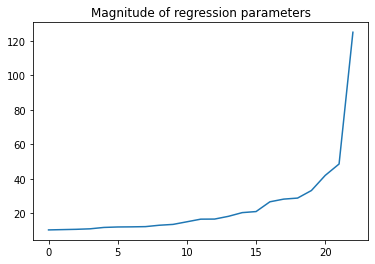


R3
Top scores [ 10.13065224  10.48953006  10.72709073  10.99662227  11.3775348
  11.6385755   12.05420665  12.2427636   12.50869246  13.00676074
  13.17268429  14.00090756  17.82371951  19.15849349  19.80000771
  20.7976791   20.8123601   28.01676362  28.85010181  31.11820518
  32.84453127  44.72001943  48.93896751 127.49534266]
top genes ['pcaU' 'lifO' 'acoC' 'cysP' 'amdA' 'catA' 'nthA' 'catB' 'acs' 'mdaB'
 'pcaJ' 'hcaK' 'mmsB' 'lipA' 'sodM' 'tatA' 'gltI' 'mmsA' 'acoD' 'acoA'
 'aceA' 'acoB' 'ndh' 'adhA']


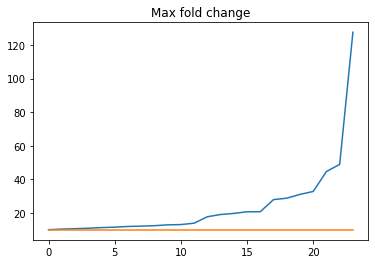

High scoring genes ['aceA' 'acoA' 'acoB' 'acoC' 'acoD' 'acs' 'adhA' 'amdA' 'catA' 'catB'
 'cysP' 'gltI' 'hcaK' 'lifO' 'lipA' 'mdaB' 'mmsA' 'mmsB' 'ndh' 'nthA'
 'oxd' 'pcaJ' 'pcaU' 'sodM' 'tatA'] total num genes: 25 overalpping genes between two scores: 22
number of Max Fold Genes above 10-fold change: 24
number of Normalized Parameter magnitude above 10:  23


In [79]:
def scoring_function(xs):
    """
    @param xs: list of length 3, each element is a list of length 4 that has gene expression levels.
    @returns: a score for the genes based on the max fold change and the size of the parameters explaining it in 
                a simple model.
    """
    pres = [xs[0][0], xs[1][0], xs[2][0]]
    posts = [xs[0][1], xs[1][1], xs[2][1], xs[0][2], xs[1][2], xs[2][2], xs[0][3], xs[1][3], xs[2][3]]
    params = find_params(pres, posts)
    meanPre = np.mean(pres)
    meanLB = np.mean(posts[0:3])
    meanM9Lq = np.mean(posts[3:6])
    meanM9Sf = np.mean(posts[6:9])
    fold_changes = [(meanLB - meanPre) / meanPre, (meanM9Lq - meanPre) / meanPre, (meanM9Sf - meanPre) / meanPre]
    max_fold_change = np.max(fold_changes)
    paramsMagnitude = np.linalg.norm(params)
    return paramsMagnitude / meanPre#max_fold_change

all_xs = []
scores = []
for j in range(len(full_datasets["R1"])):
    xs = []
    for i in range(3):
        xs.append(full_datasets["R" + str(i+1)][j])
    scores.append(scoring_function(xs))
sorted_by_score_genes = sort_results(np.array(scores), genes)
sorted_scores = sort_results(np.array(scores), np.array(scores))
print("\nR" + str(i+1))
print("Top scores", sorted_scores[-23:])
topParamMagGenes = sorted_by_score_genes[-23:]
print("top genes", topParamMagGenes)
plt.plot(sorted_scores[-23:])
plt.title("Magnitude of regression parameters")
plt.show()


def scoring_function(xs):
    """
    @param xs: list of length 3, each element is a list of length 4 that has gene expression levels.
    @returns: a score for the genes based on the max fold change and the size of the parameters explaining it in 
                a simple model.
    """
    pres = [xs[0][0], xs[1][0], xs[2][0]]
    posts = [xs[0][1], xs[1][1], xs[2][1], xs[0][2], xs[1][2], xs[2][2], xs[0][3], xs[1][3], xs[2][3]]
    params = find_params(pres, posts)
    meanPre = np.mean(pres)
    meanLB = np.mean(posts[0:3])
    meanM9Lq = np.mean(posts[3:6])
    meanM9Sf = np.mean(posts[6:9])
    fold_changes = [(meanLB - meanPre) / meanPre, (meanM9Lq - meanPre) / meanPre, (meanM9Sf - meanPre) / meanPre]
    max_fold_change = np.max(fold_changes)
    paramsMagnitude = np.linalg.norm(params)
    return max_fold_change #paramsMagnitude
all_xs = []
scores = []
for j in range(len(full_datasets["R1"])):
    xs = []
    for i in range(3):
        xs.append(full_datasets["R" + str(i+1)][j])
    scores.append(scoring_function(xs))
sorted_by_score_genes = sort_results(np.array(scores), genes)
sorted_scores = sort_results(np.array(scores), np.array(scores))
print("\nR" + str(i+1))
print("Top scores", sorted_scores[-24:])
topMaxFoldChangeGenes = sorted_by_score_genes[-24:]
print("top genes", topMaxFoldChangeGenes)
plt.plot(sorted_scores[-24:])
plt.plot([10 for i in range(24)])
plt.title("Max fold change")
plt.show()

topGenes = set(list(topMaxFoldChangeGenes) + list(topParamMagGenes))
overlapGenes = len(list(topMaxFoldChangeGenes) + list(topParamMagGenes)) - len(list(topGenes))
print("High scoring genes", np.sort(list(topGenes)), "total num genes:", len(list(topGenes)),
      "overalpping genes between two scores:", overlapGenes)
print("number of Max Fold Genes above 10-fold change:", len(topMaxFoldChangeGenes))
print("number of Normalized Parameter magnitude above 10: ", len(topParamMagGenes))


R3
Top scores [  2.00071304   2.00095357   2.00474474   2.01267517   2.01368389
   2.01800612   2.02816822   2.03461349   2.04556111   2.05115917
   2.05178229   2.06937699   2.06981722   2.07938405   2.08869009
   2.09004439   2.12240426   2.13364072   2.14178684   2.20302085
   2.21135932   2.22277267   2.24207371   2.25116066   2.25877772
   2.32911769   2.34180056   2.34592325   2.37220374   2.3886524
   2.3911919    2.40470381   2.4132301    2.43169637   2.43342382
   2.47426194   2.50407576   2.50609272   2.52302054   2.52576226
   2.57244096   2.59379555   2.63561827   2.63793445   2.64376645
   2.70398842   2.72825523   2.77195848   2.80206551   2.80667784
   2.84457415   2.86815234   2.87741578   2.90702352   2.90753368
   2.91131073   2.94746558   2.96884165   2.99122293   2.99603653
   3.04977198   3.07274803   3.12558682   3.12777403   3.13122126
   3.1454775    3.18371704   3.3273261    3.33413861   3.34618679
   3.34650462   3.39119329   3.39528664   3.40513301   3.43545

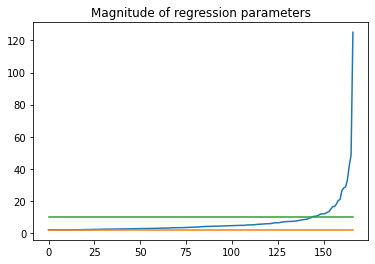


R3
Top scores [  2.01043238   2.03702916   2.04204137   2.04333805   2.0578892
   2.06105673   2.13377557   2.13387314   2.16463814   2.16661809
   2.17395835   2.17926235   2.23986367   2.24954176   2.25317669
   2.25356126   2.33425796   2.36369045   2.398981     2.41124285
   2.41187497   2.43796191   2.43975843   2.45661761   2.46110836
   2.46558696   2.55203539   2.57108214   2.586126     2.63684472
   2.6615272    2.67072139   2.67678224   2.68731996   2.74240738
   2.7699538    2.8148809    2.84250867   2.8698608    2.87046335
   2.88171111   2.89588952   2.93612018   2.943901     2.97696138
   2.98012292   3.02477081   3.02512255   3.10278725   3.11395785
   3.15669443   3.17241977   3.17802329   3.21430653   3.26075597
   3.33380099   3.33850312   3.35179593   3.37828737   3.3837817
   3.53682102   3.56620003   3.598736     3.61961035   3.87862686
   3.96502292   3.98536546   4.0155647    4.04681836   4.05667384
   4.07297597   4.09099411   4.103668     4.17431599   4.237384

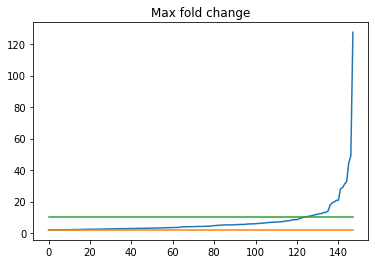

High scoring genes ['acdB' 'aceA' 'ack' 'acoA' 'acoB' 'acoC' 'acoD' 'acoL' 'acr1' 'acs'
 'adhA' 'ahpF' 'algR' 'alkK' 'alkM' 'alrA' 'amdA' 'antB' 'antC' 'areA'
 'areB' 'areC' 'aro' 'aroQ' 'aspQ' 'astA' 'astB' 'astC' 'astD' 'atoA'
 'atoB' 'atoD' 'atoE' 'atsC' 'bccA' 'benA' 'benB' 'benC' 'benD' 'benK'
 'betI' 'bfrA' 'braF' 'budC' 'caiB' 'caiD' 'catA' 'catB' 'catC' 'catD'
 'catF' 'catI' 'catJ' 'catM' 'cioA' 'cioB' 'citN' 'clpA' 'clpS' 'comB'
 'comP' 'copA' 'cstA' 'cysI' 'cysK' 'cysP' 'cysT' 'czcB' 'czcC' 'dcaA'
 'dcaC' 'dcaE' 'dcaI' 'dcaJ' 'dcaK' 'dcaP' 'ddrR' 'desC' 'ecnB' 'emrA'
 'entB' 'fadE' 'fdxA' 'fecI' 'fecR' 'folD' 'fpr' 'fumC' 'gabD' 'gabT'
 'gbh' 'gcdH' 'ggt' 'glcB' 'glpD' 'gltI' 'gltJ' 'gpo' 'hcaA' 'hcaB' 'hcaC'
 'hcaD' 'hcaE' 'hcaK' 'hchA' 'hemO' 'himA' 'ibp' 'icd' 'iciA' 'iscR'
 'iscS' 'lifO' 'linC' 'lip1' 'lipA' 'lolA' 'lrp' 'mdaB' 'mdcC' 'mdcL'
 'mdcM' 'mdcR' 'mmsA' 'mmsB' 'moaA' 'msrB' 'ndh' 'nthA' 'nthB' 'otsA'
 'otsB' 'oxd' 'pcaB' 'pcaC' 'pcaD' 'pcaF' 'pcaG' 'pcaH' 'pcaI'

In [81]:
def scoring_function(xs):
    """
    @param xs: list of length 3, each element is a list of length 4 that has gene expression levels.
    @returns: a score for the genes based on the max fold change and the size of the parameters explaining it in 
                a simple model.
    """
    pres = [xs[0][0], xs[1][0], xs[2][0]]
    posts = [xs[0][1], xs[1][1], xs[2][1], xs[0][2], xs[1][2], xs[2][2], xs[0][3], xs[1][3], xs[2][3]]
    params = find_params(pres, posts)
    meanPre = np.mean(pres)
    meanLB = np.mean(posts[0:3])
    meanM9Lq = np.mean(posts[3:6])
    meanM9Sf = np.mean(posts[6:9])
    fold_changes = [(meanLB - meanPre) / meanPre, (meanM9Lq - meanPre) / meanPre, (meanM9Sf - meanPre) / meanPre]
    max_fold_change = np.max(fold_changes)
    paramsMagnitude = np.linalg.norm(params)
    return paramsMagnitude / meanPre#max_fold_change

numMeas = 200-52
adj = 19

all_xs = []
scores = []
for j in range(len(full_datasets["R1"])):
    xs = []
    for i in range(3):
        xs.append(full_datasets["R" + str(i+1)][j])
    scores.append(scoring_function(xs))
sorted_by_score_genes = sort_results(np.array(scores), genes)
sorted_scores = sort_results(np.array(scores), np.array(scores))
print("\nR" + str(i+1))
print("Top scores", sorted_scores[-numMeas-adj:])
topParamMagGenes = sorted_by_score_genes[-numMeas-adj:]
print("top genes", topParamMagGenes)
plt.plot(sorted_scores[-numMeas-adj:])
plt.plot([2 for i in range(numMeas+ adj)])
plt.plot([10 for i in range(numMeas+ adj)])
plt.title("Magnitude of regression parameters")
plt.show()


def scoring_function(xs):
    """
    @param xs: list of length 3, each element is a list of length 4 that has gene expression levels.
    @returns: a score for the genes based on the max fold change and the size of the parameters explaining it in 
                a simple model.
    """
    pres = [xs[0][0], xs[1][0], xs[2][0]]
    posts = [xs[0][1], xs[1][1], xs[2][1], xs[0][2], xs[1][2], xs[2][2], xs[0][3], xs[1][3], xs[2][3]]
    params = find_params(pres, posts)
    meanPre = np.mean(pres)
    meanLB = np.mean(posts[0:3])
    meanM9Lq = np.mean(posts[3:6])
    meanM9Sf = np.mean(posts[6:9])
    fold_changes = [(meanLB - meanPre) / meanPre, (meanM9Lq - meanPre) / meanPre, (meanM9Sf - meanPre) / meanPre]
    max_fold_change = np.max(fold_changes)
    paramsMagnitude = np.linalg.norm(params)
    return max_fold_change #paramsMagnitude
all_xs = []
scores = []
for j in range(len(full_datasets["R1"])):
    xs = []
    for i in range(3):
        xs.append(full_datasets["R" + str(i+1)][j])
    scores.append(scoring_function(xs))
sorted_by_score_genes = sort_results(np.array(scores), genes)
sorted_scores = sort_results(np.array(scores), np.array(scores))
print("\nR" + str(i+1))
print("Top scores", sorted_scores[-numMeas:])
topMaxFoldChangeGenes = sorted_by_score_genes[-numMeas:]
print("top genes", topMaxFoldChangeGenes)
plt.plot(sorted_scores[-numMeas:])
plt.plot([2 for i in range(numMeas)])
plt.plot([10 for i in range(numMeas)])
plt.title("Max fold change")
plt.show()

topGenes = set(list(topMaxFoldChangeGenes) + list(topParamMagGenes))
overlapGenes = len(list(topMaxFoldChangeGenes) + list(topParamMagGenes)) - len(list(topGenes))
print("High scoring genes", np.sort(list(topGenes)), "total num genes:", len(list(topGenes)),
      "overalpping genes between two scores:", overlapGenes)
print("number of Max Fold Genes above 2-fold change:", len(topMaxFoldChangeGenes))
print("number of Normalized Parameter magnitude above 2: ", len(topParamMagGenes))

In [34]:

params = []
for j in range(len(full_datasets["R1"])):
    pre = []
    post = []
    for i in range(3):
        pre.append(full_datasets["R" + str(i+1)][j,0])
        post.append(full_datasets["R" + str(i+1)][j,1])
        post.append(full_datasets["R" + str(i+1)][j,2])
        post.append(full_datasets["R" + str(i+1)][j,3])
    params.append(find_params(pre, post))
print(np.shape(params))
# OK

(1152, 3)
